# Logistic Regression - An Explanation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

from helper_funcitons import draw_line, plot_our_data, plot_data_and_line, plot_data_line_residuals_ssr, create_data_line_residuals_rmse, draw_line_sigmoid
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris_target = iris.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_data   = iris_data[0:100]
iris_target = iris_target[0:100] 

Text(0, 0.5, 'Sepal Width')

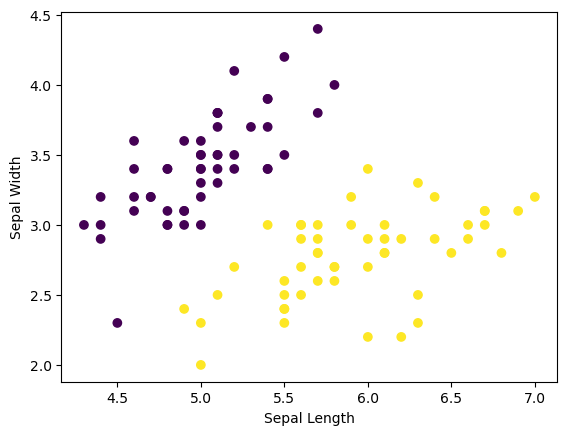

In [5]:
import matplotlib.pyplot as plt
 
plt.scatter(iris_data[:,0],iris_data[:,1], c=iris_target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

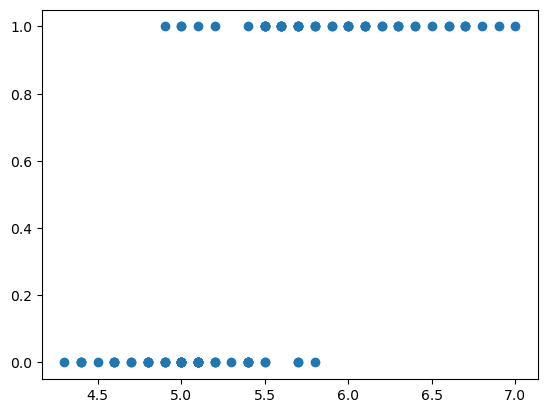

In [6]:
plt.scatter(iris_data[:,0], iris_target)

# Let's try to recap Linear Regression
All of us remember what a line is ?

In [7]:
w = interactive(draw_line, 
                slope = widgets.FloatSlider(min=-20, max=20, step=0.1, value=1),
               intercept = widgets.FloatSlider(min=-3, max=3, step=0.5, value=0))

display(w)

interactive(children=(FloatSlider(value=1.0, description='slope', max=20.0, min=-20.0), FloatSlider(value=0.0,…

# Let's make it more interactive

In [8]:
w = interactive(plot_data_and_line, 
                slope = widgets.FloatSlider(min=-2, max=4, step=0.1, value=1),
               intercept = widgets.FloatSlider(min=-10, max=15, step=0.1, value=0))

display(w)

interactive(children=(FloatSlider(value=1.0, description='slope', max=4.0, min=-2.0), FloatSlider(value=0.0, d…

<h1><center>We need to find the line that minimises Variance</center></h1>

In [9]:
w = interactive(plot_data_line_residuals_ssr, 
                slope = widgets.FloatSlider(min=-2, max=4, step=0.05, value=1),
               intercept = widgets.FloatSlider(min=-10, max=20, step=0.5, value=0))

display(w)

interactive(children=(FloatSlider(value=1.0, description='slope', max=4.0, min=-2.0, step=0.05), FloatSlider(v…

### Now that we remember what linear regression did.
How can we use this line to classify

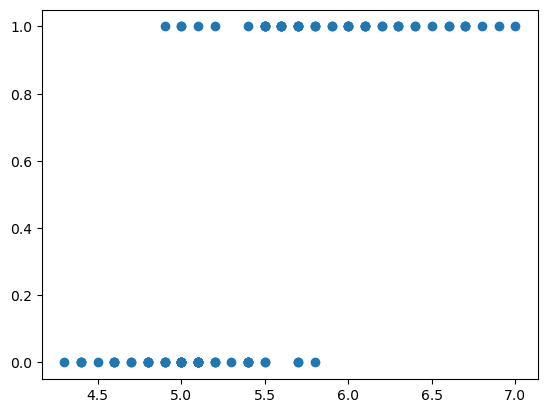

In [10]:
plt.scatter(iris_data[:,0], iris_target)

# Probability vs Odds
What is it, why do we care.

In [11]:
# Probability of victory
9/10

0.9

In [12]:
# Odds of victory
9/1

9.0

In [13]:
# Probability of victory
8/10

0.8

In [14]:
# Odds of victory
8/2

4.0

In [15]:
# Probability of victory
7/10

0.7

In [16]:
# Odds of victory
7/3

2.3333333333333335

In [17]:
# Probability of victory
6/10

0.6

In [18]:
# Odds of victory
6/4

1.5

In [19]:
# Probability of victory
5/10

0.5

In [20]:
# Odds of victory
5/5

1.0

In [21]:
# Probability of victory
4/10

0.4

In [22]:
# Odds of victory
4/6

0.6666666666666666

In [23]:
# Probability of victory
3/10

0.3

In [24]:
# Odds of victory
3/7

0.42857142857142855

In [25]:
# Probability of victory
2/10

0.2

In [26]:
# Odds of victory
2/8

0.25

In [27]:
# Probability of victory
1/10

0.1

In [28]:
# Odds of victory
1/9

0.1111111111111111

# Odds are asymmetrical 

In [29]:
15/3

5.0

In [30]:
3/15

0.2

In [31]:
50/38

1.3157894736842106

In [32]:
38/50

0.76

### Let's try log of odds

In [33]:
15/9

1.6666666666666667

In [34]:
9/15

0.6

In [35]:
import math
math.log(15/9)

0.5108256237659907

In [36]:
math.log(9/15)

-0.5108256237659907

In [37]:
# Let's try another example

In [38]:
13/2

6.5

In [39]:
2/13

0.15384615384615385

In [40]:
math.log(13/2)

1.8718021769015913

In [41]:
math.log(2/13)

-1.8718021769015913

# Should we take a log of odds

![](https://media.tenor.com/uJC_A-CJSkUAAAAC/hmm-dot-dot-dot.gif)

### Why do we care

![](https://www.researchgate.net/publication/263728152/figure/fig1/AS:529346151620608@1503217365928/Odds-as-a-function-of-probability-op.png)

In [42]:
9/10

0.9

In [43]:
9/1

9.0

In [44]:
99/100

0.99

In [45]:
99/1

99.0

In [46]:
999/1000

0.999

In [47]:
999/1

999.0

In [48]:
10/100

0.1

In [49]:
10/90

0.1111111111111111

In [50]:
1/100

0.01

In [51]:
1/99

0.010101010101010102

In [52]:
0.1/100

0.001

In [1]:
0.01/99.9

0.00010010010010010009

In [2]:
75/100

0.75

In [3]:
75/25

3.0

In [8]:
25/99999

0.00025000250002500023

In [9]:
75/25

3.0

In [10]:
25/75

0.3333333333333333

In [12]:
from math import log

In [13]:
log(75/25)

1.0986122886681098

In [15]:
log(25/75)

-1.0986122886681098

In [21]:
log(1/999999999999999999999)

-48.35428695287496

---------
![](probability_vs_odds.png)

### What if, i did decide to take a log. 

![](probability_vs_logodds.png)

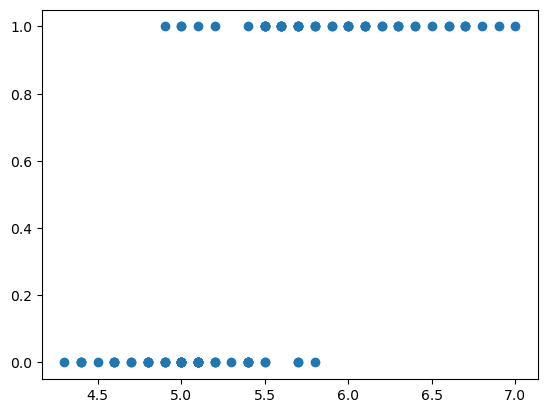

In [54]:
plt.scatter(iris_data[:,0], iris_target)

# Let's see

In [55]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
 
# Initialise
model = LogisticRegression()

In [56]:
model.fit(iris_data[:,0].reshape(-1,1), iris_target)

LogisticRegression()

In [57]:
model.intercept_

array([-17.23182528])

In [58]:
model.coef_

array([[3.1732613]])

In [59]:
x_test = np.linspace(4.0,7.0,100)
# predict dummy y_test data based on the logistic model
y_test = x_test * model.coef_ + model.intercept_
sigmoid = expit(y_test)

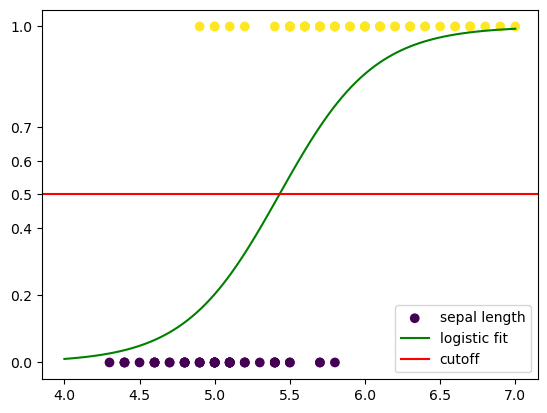

In [60]:
plt.scatter(iris_data[:,0],iris_target, c=iris_target,label = "sepal length")
 
# ravel to convert the 2-d array to a flat array
plt.plot(x_test,sigmoid.ravel(),c="green", label = "logistic fit")
plt.yticks([0, 0.2, 0.4, 0.5, 0.6, 0.7, 1])
plt.axhline(.5, color="red", label="cutoff")
plt.legend(loc="lower right")

# Visualising

In [61]:
w = interactive(draw_line_sigmoid, 
                slope = widgets.FloatSlider(min=-20, max=20, step=0.1, value=1),
               intercept = widgets.FloatSlider(min=-3, max=3, step=0.5, value=0))

display(w)

interactive(children=(FloatSlider(value=1.0, description='slope', max=20.0, min=-20.0), FloatSlider(value=0.0,…

# What is a sigmoid funciton
![](https://www.gstatic.com/education/formulas2/472522532/en/sigmoid_function.svg)

![](https://i.gifer.com/15wQ.gif)

# We meet at 11:45

# Cost function
```Cost =−(𝑦𝑙𝑜𝑔(𝑃)+(1−𝑦)  log⁡(1−𝑃))```
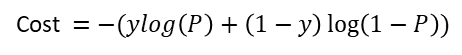

# A detailed report  (Additional)

In [62]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [63]:
model = smf.glm("species~sepal_length",data=df,family=sm.families.Binomial()).fit()

print(model.summary())

NameError: name 'df' is not defined

--------

# Do we understand logistic regression
# How it works
# How do we use it